# **Statistics for Classification**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## **Logistic Regression**

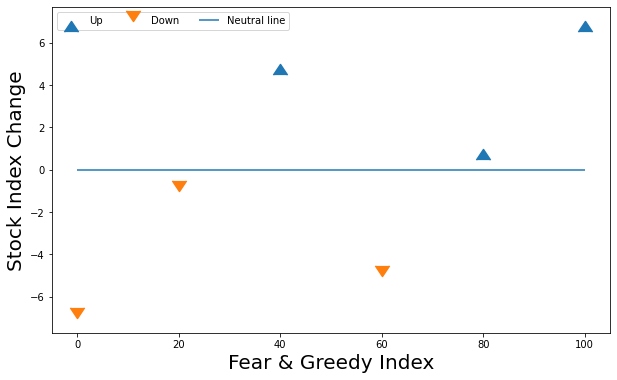

In [2]:
np.random.seed(894288)
fg_index = np.linspace(0,100,6)
stock_index_change = (fg_index-50)*0.3 - np.sign((fg_index-50)*0.3)*8

plt.figure(figsize=(10,6))
plt.scatter(fg_index[stock_index_change > 0],
            stock_index_change[stock_index_change > 0],
            s=200,
            marker=6,
            label="Up")
plt.scatter(fg_index[stock_index_change < 0],
            stock_index_change[stock_index_change < 0],
            s=200,
            marker=7,
            label="Down")
plt.hlines(0,0,100,label="Neutral line")
plt.xlabel("Fear & Greedy Index",fontsize=20)
plt.ylabel("Stock Index Change",fontsize=20)
plt.legend(ncol=3);

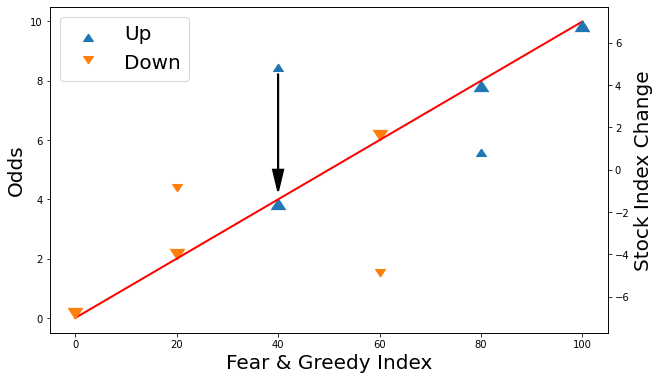

In [3]:
slope, intercept = 0.1, 0  
fig, ax1 = plt.subplots(figsize=(10,6)) 

ax1.scatter(fg_index[stock_index_change > 0],             
            (slope*fg_index + intercept)[stock_index_change > 0],             
            s=200,             
            marker=6,            
            label = "Up") 

ax1.scatter(fg_index[stock_index_change < 0],
            (slope*fg_index + intercept)[stock_index_change < 0],
            s=200,   
            marker=7,            
            label = "Down") 

ax1.plot(fg_index, slope*fg_index + intercept,
         linewidth=2,
         c="red",
        label="Odds")

ax2 = ax1.twinx() 

ax2.scatter(fg_index[stock_index_change > 0],             
            stock_index_change[stock_index_change > 0],            
            s=100,             
            marker=6,             
            label="Up") 
ax2.scatter(fg_index[stock_index_change < 0],             
            stock_index_change[stock_index_change < 0],            
            s=100,            
            marker=7,             
            label="Down") 

ax2.arrow(fg_index[2],stock_index_change[2]-0.5,0,-4.5,head_width=2, head_length=1, fc='k', ec='k',linewidth=2)

ax1.set_xlabel("Fear & Greedy Index",fontsize=20) 
ax1.set_ylabel("Odds",fontsize=20) 
ax2.set_ylabel("Stock Index Change",fontsize=20) 
plt.legend(fontsize=20);

### **Change intercept**

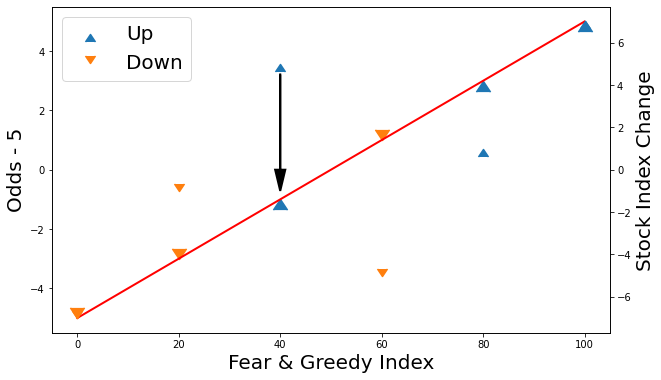

In [4]:
slope, intercept = 0.1, -5 
fig, ax1 = plt.subplots(figsize=(10,6)) 

ax1.scatter(fg_index[stock_index_change > 0],             
            (slope*fg_index + intercept)[stock_index_change > 0],             
            s=200,             
            marker=6,            
            label = "Up") 

ax1.scatter(fg_index[stock_index_change < 0],
            (slope*fg_index + intercept)[stock_index_change < 0],
            s=200,   
            marker=7,            
            label = "Down") 

ax1.plot(fg_index, slope*fg_index + intercept,
         linewidth=2,
         c="red")

ax2 = ax1.twinx() 

ax2.scatter(fg_index[stock_index_change > 0],             
            stock_index_change[stock_index_change > 0],            
            s=100,             
            marker=6,             
            label="Up") 
ax2.scatter(fg_index[stock_index_change < 0],             
            stock_index_change[stock_index_change < 0],            
            s=100,            
            marker=7,             
            label="Down") 

ax2.arrow(fg_index[2],stock_index_change[2]-0.5,0,-4.5,head_width=2, head_length=1, fc='k', ec='k',linewidth=2)

# ax1.axhline(0,linewidth=2,linestyle=":",label="Critical Odds value")

ax1.set_xlabel("Fear & Greedy Index",fontsize=20) 
ax1.set_ylabel("Odds - 5",fontsize=20) 
ax2.set_ylabel("Stock Index Change",fontsize=20) 
plt.legend(fontsize=20);

### **Logistic function**

In [5]:
def logistic(x):
  return 1 / (1 + np.exp(-x))

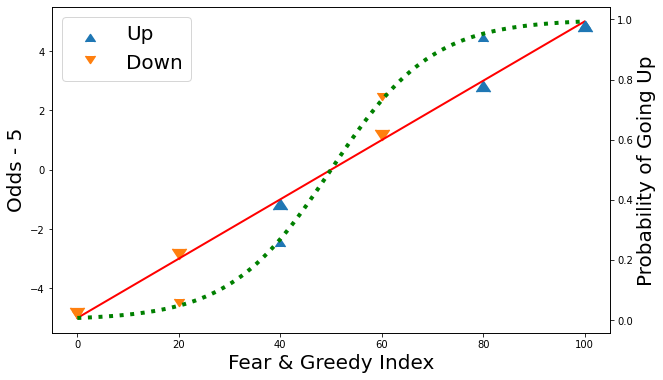

In [6]:
def cal_shifted_odds(val, slope, intercept):
    return val*slope + intercept

slope, intercept = 0.1, -5
fig, ax1 = plt.subplots(figsize=(10,6)) 

shifted_odds = cal_shifted_odds(fg_index,slope,intercept)

ax1.scatter(fg_index[stock_index_change > 0],             
            shifted_odds[stock_index_change > 0],             
            s=200,             
            marker=6,            
            label = "Up") 

ax1.scatter(fg_index[stock_index_change < 0],
            shifted_odds[stock_index_change < 0],
            s=200,   
            marker=7,            
            label = "Down") 

ax1.plot(fg_index, shifted_odds,
         linewidth=2,
         c="red")

ax2 = ax1.twinx() 

ax2.scatter(fg_index[stock_index_change > 0],             
            logistic(shifted_odds)[stock_index_change > 0],            
            s=100,             
            marker=6,             
            label="Up") 
ax2.scatter(fg_index[stock_index_change < 0],             
            logistic(shifted_odds)[stock_index_change < 0],            
            s=100,            
            marker=7,             
            label="Down") 

fg_grids = np.linspace(0,100,100)

ax2.plot(fg_grids, 
         logistic(cal_shifted_odds(fg_grids,slope,intercept)),
        linewidth=4,
        linestyle=":",
        c="green")

ax1.set_xlabel("Fear & Greedy Index",fontsize=20) 
ax1.set_ylabel("Odds - 5",fontsize=20) 
ax2.set_ylabel("Probability of Going Up",fontsize=20) 
plt.legend(fontsize=20);

### **Test positiveness**

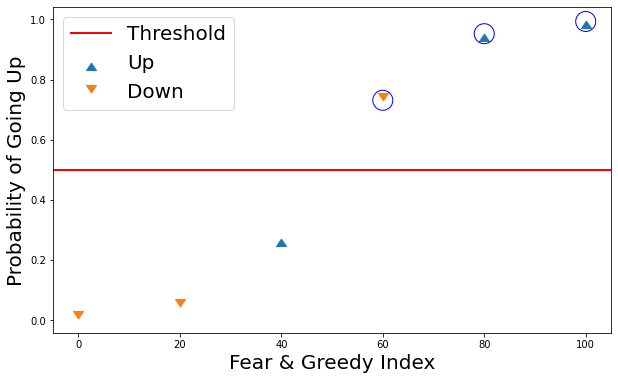

In [7]:
slope, intercept, threshold = 0.1, -5, 0.5
fig, ax1 = plt.subplots(figsize=(10,6)) 

shifted_odds = cal_shifted_odds(fg_index,slope,intercept)

ax1.axhline(threshold,
         linewidth=2,
         c="red",
            label="Threshold")


ax1.scatter(fg_index[stock_index_change > 0],             
            logistic(shifted_odds)[stock_index_change > 0],            
            s=100,             
            marker=6,             
            label="Up") 
ax1.scatter(fg_index[stock_index_change < 0],             
            logistic(shifted_odds)[stock_index_change < 0],            
            s=100,            
            marker=7,             
            label="Down") 

ax1.scatter(fg_index[logistic(cal_shifted_odds(fg_index,slope,intercept)) > threshold],
        logistic(cal_shifted_odds(fg_index,slope,intercept))[logistic(cal_shifted_odds(fg_index,slope,intercept)) > threshold],
        s=400, 
         facecolors='none', 
         edgecolors='b')

ax1.set_xlabel("Fear & Greedy Index",fontsize=20) 
ax1.set_ylabel("Probability of Going Up",fontsize=20) 
ax1.legend(fontsize=20);

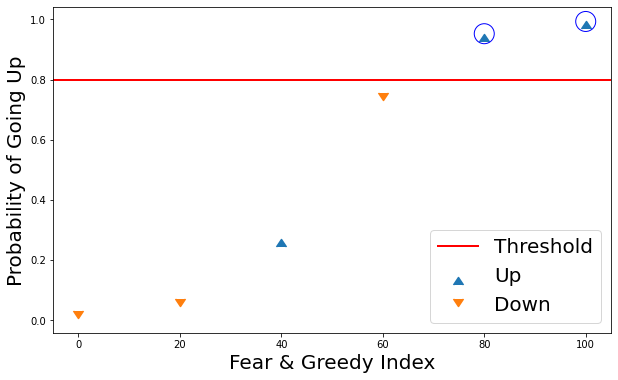

In [8]:
slope, intercept, threshold = 0.1, -5, 0.8
fig, ax1 = plt.subplots(figsize=(10,6)) 

shifted_odds = cal_shifted_odds(fg_index,slope,intercept)

ax1.axhline(threshold,
         linewidth=2,
         c="red",
            label="Threshold")


ax1.scatter(fg_index[stock_index_change > 0],             
            logistic(shifted_odds)[stock_index_change > 0],            
            s=100,             
            marker=6,             
            label="Up") 
ax1.scatter(fg_index[stock_index_change < 0],             
            logistic(shifted_odds)[stock_index_change < 0],            
            s=100,            
            marker=7,             
            label="Down") 

ax1.scatter(fg_index[logistic(cal_shifted_odds(fg_index,slope,intercept)) > threshold],
        logistic(cal_shifted_odds(fg_index,slope,intercept))[logistic(cal_shifted_odds(fg_index,slope,intercept)) > threshold],
        s=400, 
         facecolors='none', 
         edgecolors='b')

ax1.set_xlabel("Fear & Greedy Index",fontsize=20) 
ax1.set_ylabel("Probability of Going Up",fontsize=20) 
ax1.legend(fontsize=20);

### **Maximize likelihood**

In [9]:
probs = logistic(cal_shifted_odds(fg_index,slope,intercept))
probs

array([0.00669285, 0.04742587, 0.26894142, 0.73105858, 0.95257413,
       0.99330715])

In [10]:
np.prod(probs[stock_index_change>0])*np.prod(1-probs[stock_index_change<0])

0.06475600928864741

#### **Another set of parameters**

In [11]:
probs = logistic(cal_shifted_odds(fg_index,
                                  slope=0.11,intercept=-5.5))
np.prod(probs[stock_index_change>0])*np.prod(1-probs[stock_index_change<0])

0.057540510171776825

In [12]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(penalty="none",
                              solver="newton-cg").fit(fg_index.reshape(-1,1),
                                     stock_index_change>0)

print("slope: ",regressor.coef_[0][0])
print("intercept: ",regressor.intercept_[0])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


slope:  0.060701378857920416
intercept:  -3.035068939449039


In [13]:
probs = logistic(cal_shifted_odds(fg_index,
                                  slope=0.06070138,intercept=-3.03506894))
np.prod(probs[stock_index_change>0])*np.prod(1-probs[stock_index_change<0])

0.08391198433138393

## **Naïve Bayesian Classification from Scratch**

### **sample data**

In [14]:
import pandas as pd
from collections import Counter

In [15]:
stroke_risk = pd.read_csv("strok_risk.csv")

In [16]:
stroke_risk

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
2,high,yes,yes,high
3,middle,no,no,low
4,high,yes,yes,high
5,high,no,yes,high
6,low,yes,no,middle
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high


In [17]:
def build_probabilities(df,feature_columns:list, category_variable:str):
    # build prior probabilities
    prior_probability = Counter(df[category_variable])
    # build conditional probabilities 
    conditional_probabilities = {}
    for key in prior_probability:
        conditional_probabilities[key] = {}
        # for each category variable cases
        for feature in feature_columns:
            feature_kinds = set(np.unique(df[feature]))
            feature_dict = Counter(df[df[category_variable]==key][feature])
            for possible_feature in feature_kinds:
                if possible_feature not in feature_dict:
                    feature_dict[possible_feature] = 0
            total = sum(feature_dict.values())
            for feature_level in feature_dict:
                feature_dict[feature_level] /= total
            conditional_probabilities[key] [feature] = feature_dict
    return prior_probability, conditional_probabilities

In [18]:
prior_prob, conditional_prob = build_probabilities(stroke_risk,
                    feature_columns=["weight","high_oil_diet","smoking"],
                    category_variable="stroke_risk")

In [19]:
from pprint import pprint
pprint(conditional_prob)

{'high': {'high_oil_diet': Counter({'yes': 0.5, 'no': 0.5}),
          'smoking': Counter({'yes': 1.0, 'no': 0.0}),
          'weight': Counter({'high': 0.75, 'middle': 0.25, 'low': 0.0})},
 'low': {'high_oil_diet': Counter({'no': 0.75, 'yes': 0.25}),
         'smoking': Counter({'no': 0.75, 'yes': 0.25}),
         'weight': Counter({'low': 0.5, 'middle': 0.5, 'high': 0.0})},
 'middle': {'high_oil_diet': Counter({'yes': 0.6666666666666666,
                                      'no': 0.3333333333333333}),
            'smoking': Counter({'no': 0.6666666666666666,
                                'yes': 0.3333333333333333}),
            'weight': Counter({'middle': 0.6666666666666666,
                               'low': 0.3333333333333333,
                               'high': 0.0})}}


### **prediction function**

In [20]:
def predict(prior_prob, conditional_prob, feature_values:dict):
    probs = {}
    total = sum(prior_prob.values())
    for key in prior_prob:
        probs[key] = prior_prob[key]/total
    for key in probs:
        posterior_dict = conditional_prob[key]
        for feature_name, feature_level in feature_values.items():
            probs[key] *= posterior_dict[feature_name][feature_level]
    total = sum(probs.values())
    if  total == 0:
        print("Undetermined!")
    else:
        for key in probs:
            probs[key]/= total
        return probs

In [21]:
predict(prior_prob,conditional_prob,{"weight":"middle","high_oil_diet":"no","smoking":"yes"})

{'low': 0.5094339622641509,
 'high': 0.33962264150943394,
 'middle': 0.15094339622641506}

In [22]:
predict(prior_prob,conditional_prob,{"weight":"high","high_oil_diet":"no","smoking":"no"})

Undetermined!


### **Overfitting and underfitting examples**

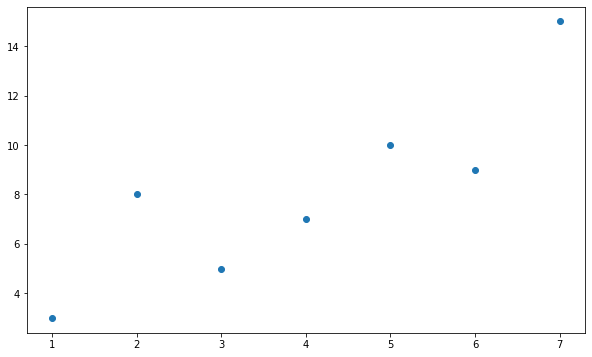

In [23]:
plt.figure(figsize=(10,6))
x_coor = [1,2,3,4,5,6,7]
y_coor = [3,8,5,7,10,9,15]
plt.scatter(x_coor,y_coor);

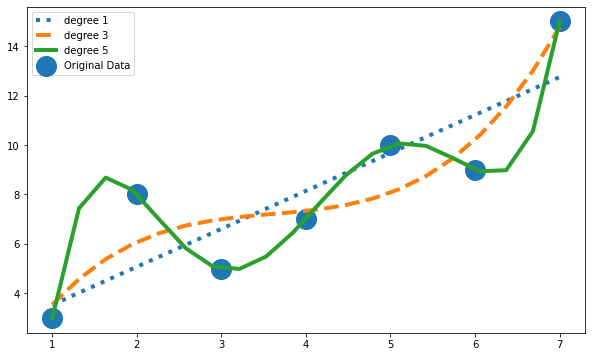

In [24]:
styles=[":","--","-"]
plt.figure(figsize=(10,6))
x = np.linspace(1,7,20)
for idx, degree in enumerate(range(1,6,2)):
    coef = np.polyfit(x_coor,y_coor,degree)
    y = np.polyval(coef,x)
    plt.plot(x,y, 
             linewidth=4,
             linestyle=styles[idx],
             label="degree {}".format(str(degree)))
plt.scatter(x_coor,y_coor,
            s=400,
            label="Original Data",
            marker="o");
plt.legend();

### **Beyond the original data**

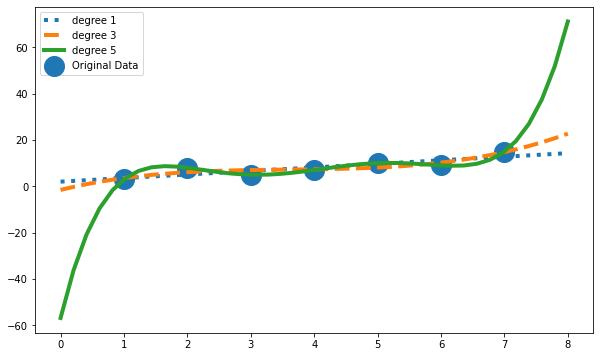

In [25]:
styles=[":","--","-"]
plt.figure(figsize=(10,6))
x = np.linspace(0,8,40)
for idx, degree in enumerate(range(1,6,2)):
    coef = np.polyfit(x_coor,y_coor,degree)
    y = np.polyval(coef,x)
    plt.plot(x,y, 
             linewidth=4,
             linestyle=styles[idx],
             label="degree {}".format(str(degree)))
plt.scatter(x_coor,y_coor,
            s=400,
            label="Original Data",
            marker="o");
plt.legend();

### **Cross-validation**

In [26]:
stroke_risk = pd.read_csv("strok_risk.csv")
stroke_risk

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
2,high,yes,yes,high
3,middle,no,no,low
4,high,yes,yes,high
5,high,no,yes,high
6,low,yes,no,middle
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high


In [27]:
def map_feature(feature_value, feature):
    if feature == "weight" or feature == "stroke_risk":
        if feature_value == "low":
            return 0
        elif feature_value == "middle":
            return 1
        else:
            return 2
    elif feature == "high_oil_diet" or feature == "smoking":
        if feature_value == "yes":
            return 1
        else:
            return 0
    else:
        print("No such feature: {}".format(feature))

In [28]:
stroke_risk.weight = stroke_risk.weight.map(lambda x: map_feature(x,"weight"))
stroke_risk.high_oil_diet = stroke_risk.high_oil_diet.map(lambda x: map_feature(x,"high_oil_diet"))
stroke_risk.smoking = stroke_risk.smoking.map(lambda x: map_feature(x,"smoking"))
stroke_risk.stroke_risk = stroke_risk.stroke_risk.map(lambda x: map_feature(x,"stroke_risk"))

In [29]:
stroke_risk

,weight,high_oil_diet,smoking,stroke_risk
0,0,1,0,0
1,0,0,1,0
2,2,1,1,2
3,1,0,0,0
4,2,1,1,2
5,2,0,1,2
6,0,1,0,1
7,0,0,1,0
8,0,0,0,0
9,1,0,1,2


In [30]:
from sklearn.linear_model import LogisticRegressionCV
X = stroke_risk[["weight","high_oil_diet","smoking"]]
y = stroke_risk["stroke_risk"]
classifier = LogisticRegressionCV(cv=3,random_state=2020,multi_class="auto").fit(X,y)

In [31]:
classifier.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(cv=3, random_state=2020)>

#### **Examine the shape of the input data**

In [32]:
X.values[:1, :]

array([[0, 1, 0]])

#### **Predict the probability**

In [33]:
classifier.predict_proba(np.array([[1.5,0.5,2]]))

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


array([[0.20456441, 0.15381685, 0.64161874]])